# Team 8 Final Project
## *Predicting Rainfall in Australia*

Authors:
* Deep Prakash Bhanushali
* Genghui Cui
* Yuxuan Qian
* Jiannan Zhu

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn import svm
# set up our pipeline for hyperparameter tuning
from sklearn.model_selection import validation_curve

In [0]:
#Lets read in the Australian rain dataset
australia = pd.read_csv('/content/drive/Shared drives/Python/original.csv')

In [0]:
australia.shape

(142193, 24)

In [0]:
australia.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008/12/6,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008/12/7,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008/12/8,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008/12/9,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008/12/10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [0]:
#Lets take a look at the data types
australia.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [0]:
# return some summary statistics on each column
australia.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [0]:
#Lets get a list of locations to gain some insights on data
australia['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [0]:
#Time to clean up our data
australia = australia.drop(['RainToday','RainTomorrow'], axis =1)
australia.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


In [0]:
#Lets do some recoding now
#If RISK_MM > 0 mm, then 1 (It will rain)
#If RISK_MM = 0 mm, then 0 (No rain)
australia['Rainfall_Status'] = np.where(australia['RISK_MM'] > 0, '1', '0')
australia.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Rainfall_Status
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0,1
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,1


In [0]:
#Lets drop the rainfall column because while building our model, it will act as a direct predictor
australia = australia.drop(['RISK_MM'], axis =1)
australia.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall_Status
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,1


# Data EDA and visualization

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frequency')

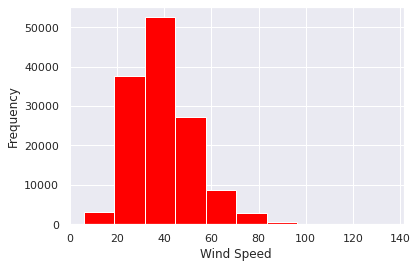

In [0]:
#Lets build some plots to explore our data more
fig, axes = plt.subplots() 
axes.hist(australia.WindGustSpeed, color="red") # first row, second entry (right top)
axes.set_xlabel("Wind Speed")
axes.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

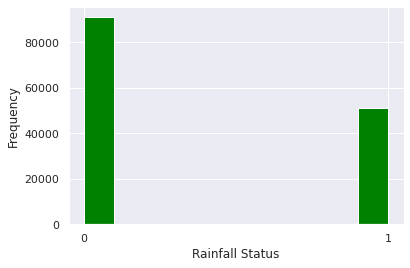

In [0]:
# explore the distributon of target variables
fig, axes = plt.subplots() 
axes.hist(australia.Rainfall_Status, color="green") 
axes.set_xlabel("Rainfall Status")
axes.set_ylabel("Frequency")

In [0]:
#Lets build a correlation matrix to get some info about our predictor variables
correlation_matrix = australia.corr().round(2)
correlation_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.00,0.74,0.10,0.47,0.07,0.18,0.18,0.18,-0.23,0.01,-0.45,-0.46,0.08,0.02,0.90,0.71
MaxTemp,0.74,1.00,-0.07,0.59,0.47,0.07,0.01,0.05,-0.51,-0.51,-0.33,-0.43,-0.29,-0.28,0.89,0.98
Rainfall,0.10,-0.07,1.00,-0.06,-0.23,0.13,0.09,0.06,0.22,0.26,-0.17,-0.13,0.20,0.17,0.01,-0.08
Evaporation,0.47,0.59,-0.06,1.00,0.37,0.20,0.19,0.13,-0.51,-0.39,-0.27,-0.29,-0.19,-0.18,0.55,0.57
Sunshine,0.07,0.47,-0.23,0.37,1.00,-0.03,0.01,0.06,-0.49,-0.63,0.04,-0.02,-0.68,-0.70,0.29,0.49
WindGustSpeed,0.18,0.07,0.13,0.20,-0.03,1.00,0.60,0.69,-0.22,-0.03,-0.46,-0.41,0.07,0.11,0.15,0.03
WindSpeed9am,0.18,0.01,0.09,0.19,0.01,0.60,1.00,0.52,-0.27,-0.03,-0.23,-0.17,0.02,0.05,0.13,0.01
WindSpeed3pm,0.18,0.05,0.06,0.13,0.06,0.69,0.52,1.00,-0.15,0.02,-0.30,-0.25,0.05,0.03,0.16,0.03
Humidity9am,-0.23,-0.51,0.22,-0.51,-0.49,-0.22,-0.27,-0.15,1.00,0.67,0.14,0.19,0.45,0.36,-0.47,-0.50
Humidity3pm,0.01,-0.51,0.26,-0.39,-0.63,-0.03,-0.03,0.02,0.67,1.00,-0.03,0.05,0.52,0.52,-0.22,-0.56


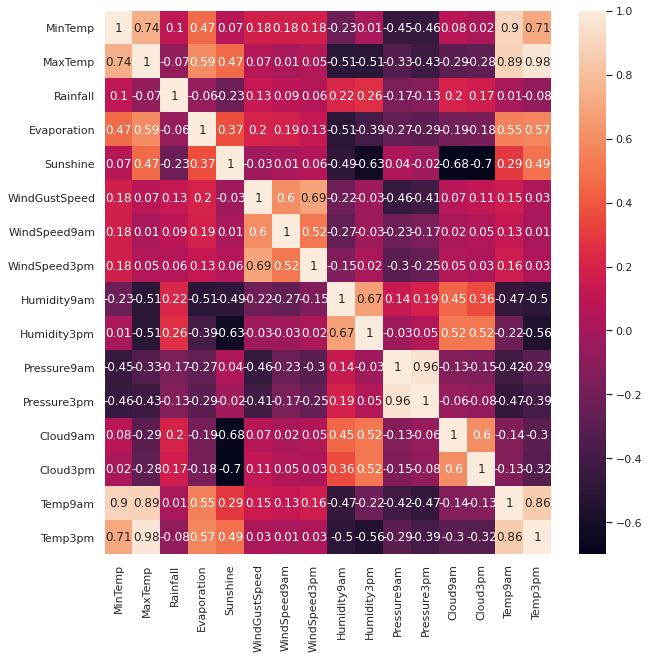

In [0]:
# bring to life with color via sns
# specify dimensions of plot
sns.set(rc={'figure.figsize':(10,10)})
# make a correlation matrix
sns.heatmap(data=correlation_matrix, annot=True)

In [0]:
australia.shape

(142193, 22)

In [0]:
australia.dtypes

Date                object
Location            object
MinTemp            float64
MaxTemp            float64
Rainfall           float64
Evaporation        float64
Sunshine           float64
WindGustDir         object
WindGustSpeed      float64
WindDir9am          object
WindDir3pm          object
WindSpeed9am       float64
WindSpeed3pm       float64
Humidity9am        float64
Humidity3pm        float64
Pressure9am        float64
Pressure3pm        float64
Cloud9am           float64
Cloud3pm           float64
Temp9am            float64
Temp3pm            float64
Rainfall_Status     object
dtype: object

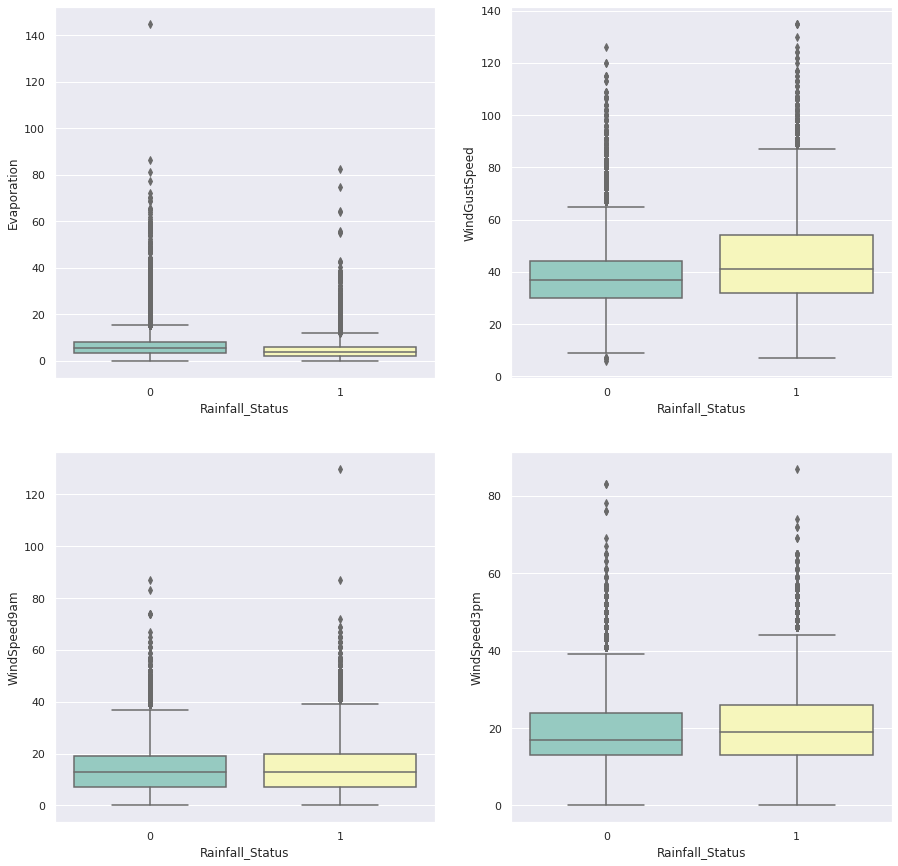

In [0]:
# check the outlier of the numerical variables
figure, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.boxplot(x='Rainfall_Status', y='Evaporation',data=australia, ax=axes[0, 0], palette="Set3")
sns.boxplot(x='Rainfall_Status', y='WindGustSpeed',data=australia, ax=axes[0, 1], palette="Set3")
sns.boxplot(x='Rainfall_Status', y='WindSpeed9am',data=australia, ax=axes[1, 0], palette="Set3")
sns.boxplot(x='Rainfall_Status', y='WindSpeed3pm',data=australia, ax=axes[1, 1], palette="Set3")
plt.show()

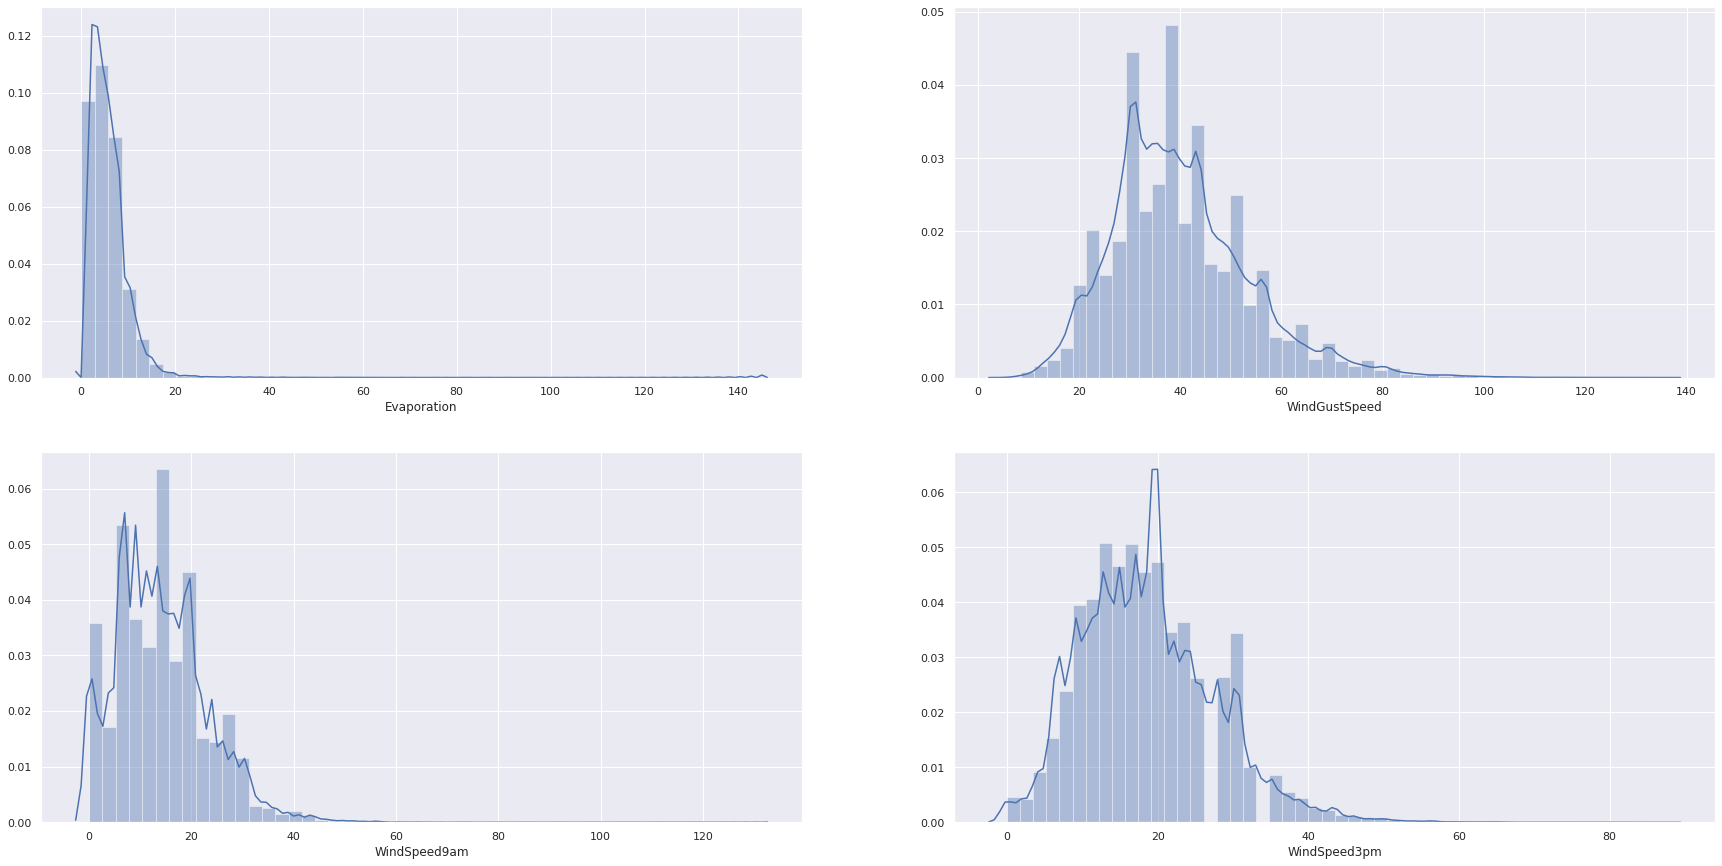

In [0]:
# search the outlier of the data
figure, axes = plt.subplots(2, 2, figsize=(30, 15))
sns.distplot(a=australia['Evaporation'].dropna(),ax=axes[0, 0])
sns.distplot(a=australia['WindGustSpeed'].dropna(),ax=axes[0, 1])
sns.distplot(a=australia['WindSpeed9am'].dropna(),ax=axes[1, 0])
sns.distplot(a=australia['WindSpeed3pm'].dropna(),ax=axes[1, 1])
plt.show()

In [0]:
# search the number of outlier of variables
list = ['Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
def find_outliers(df, feature):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_fence = df[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df[feature].quantile(0.75) + (IQR * 3)
    print('{feature} outliers are values < {lowerboundary} or > {upperboundary}'\
          .format(feature=feature, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    out_of_middan = (df[feature] < Lower_fence).sum()
    out_of_top = (df[feature] > Upper_fence).sum()
    print(f'the number of upper outlier {out_of_top}')
    print(f'the number of lower outlier {out_of_middan}')    
for feature in list:
    find_outliers(australia, feature)
    print()

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
the number of upper outlier 471
the number of lower outlier 0

WindGustSpeed outliers are values < -20.0 or > 99.0
the number of upper outlier 150
the number of lower outlier 0

WindSpeed9am outliers are values < -29.0 or > 55.0
the number of upper outlier 107
the number of lower outlier 0

WindSpeed3pm outliers are values < -20.0 or > 57.0
the number of upper outlier 81
the number of lower outlier 0



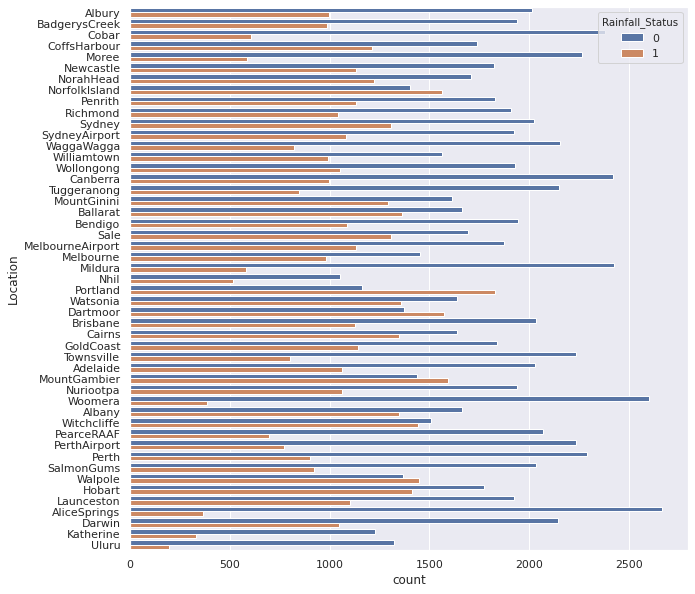

In [0]:
#Take a look at the categorical variable Location and see if different places rain more or less in Australia
ax = sns.countplot(y="Location", hue="Rainfall_Status", data=australia)

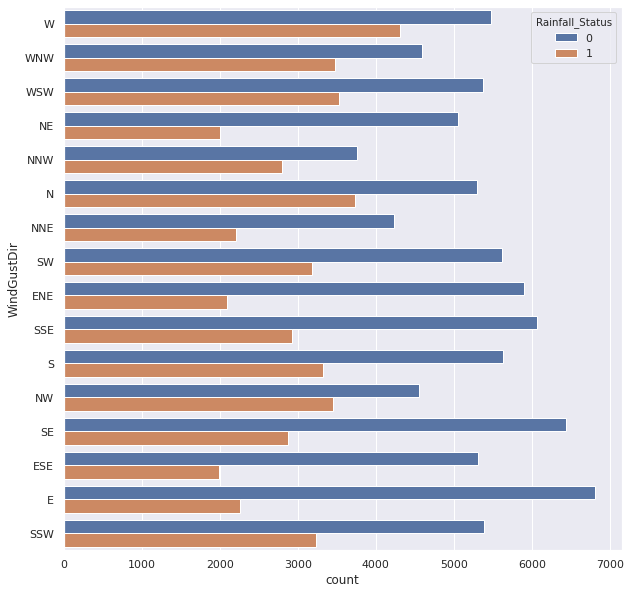

In [0]:
#Let's look at another categorical variable WindGustDir and see if it changes when climate changes
ax = sns.countplot(y="WindGustDir", hue="Rainfall_Status", data=australia)

In [0]:
# in order to draw the map of Australia, use the new data
au = pd.read_csv('/content/drive/Shared drives/Python/au.csv')
au = au[['city','lat','lng']]

In [0]:
au.rename(columns={"city":"Location"},inplace=True)

In [0]:
merge_data = pd.merge(australia,au, how='left', on="Location")

In [0]:
df = merge_data[['Location','lat','lng']]

In [0]:
au_map = df.dropna()

In [0]:
au_map = au_map.drop_duplicates()

In [0]:
import folium
import pandas as pd
m = folium.Map([-38.043995, 145.264296], zoom_start=8)
for index, row in au_map.iterrows():
  folium.Marker([row['lat'], row['lng']],tooltip=row['Location']).add_to(m)
m

# Feature engineering

1. Polynomials, interaction terms, or more “risk scores”
developed by you.

In [0]:
#Before adding polynomial features, let's first make subsets for numeric and categorical variables
australia.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall_Status
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,1


In [0]:
# Select the cities that appear on the map for analysis
australia = pd.merge(au_map,australia, how='left', on="Location")

In [0]:
# latitude, longtitude and date has no correlation with our target
australia = australia.drop(columns=['lat','lng','Date'])

In [0]:
y = australia['Rainfall_Status']
X = australia.drop(columns='Rainfall_Status')

In [0]:
#Let's subset data into 2 subsets: numeric and categorical
X_cate = X[["Location","WindGustDir","WindDir9am","WindDir3pm"]]
X_cate.head()

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW


In [0]:
categorical = ['Location','WindGustDir','WindDir9am','WindDir3pm',]
for i in categorical:
    print(X.loc[:, i].value_counts())

Canberra      3418
Sydney        3337
Perth         3193
Darwin        3192
Hobart        3188
Brisbane      3161
Adelaide      3090
Bendigo       3034
Townsville    3033
Launceston    3028
Ballarat      3028
Albany        3016
Albury        3011
Mildura       3007
Sale          3000
Portland      2996
Woomera       2990
Cairns        2988
Wollongong    2983
Newcastle     2955
Richmond      2951
Moree         2854
Melbourne     2435
Katherine     1559
Name: Location, dtype: int64
W      4969
SE     4881
N      4348
SSE    4288
E      4281
NW     4209
ENE    4019
NNW    3981
WSW    3951
WNW    3758
SW     3689
ESE    3671
NE     3628
S      3524
SSW    3419
NNE    2906
Name: WindGustDir, dtype: int64
SE     5724
SSE    5472
N      5393
S      4441
W      4435
NNW    4273
NW     4050
E      3948
NNE    3933
SW     3853
ESE    3750
NE     3663
SSW    3638
WNW    3208
ENE    3143
WSW    2934
Name: WindDir9am, dtype: int64
SE     5716
W      4782
NW     4759
NNW    4654
N      4557
WSW    4

In [0]:
#Lets use one hot encoding for categorical variables
X_cate = pd.get_dummies(X_cate, columns=categorical, drop_first=True)

In [0]:
X_cate.head()

,Location_Albany,Location_Albury,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Darwin,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_Mildura,Location_Moree,Location_Newcastle,Location_Perth,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_Townsville,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Imputation for completing missing values using k-Nearest Neighbors

In [0]:
X_num = X.drop(["Location","WindGustDir","WindDir9am","WindDir3pm"], axis=1)
X_num.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [0]:
# use the KNNimputer to deal with the missing data 
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X_num_imputer = pd.DataFrame(imputer.fit_transform(X_num))

In [0]:
X_num_imputer.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,13.4,22.9,0.6,6.1,10.15,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.0,16.9,21.8
1,7.4,25.1,0.0,8.4,9.85,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.5,0.5,17.2,24.3
2,12.9,25.7,0.0,9.0,12.25,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2
3,9.2,28.0,0.0,11.9,9.85,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,3.0,3.5,18.1,26.5
4,17.5,32.3,1.0,3.3,8.30,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


### Polynomials

In [0]:
from sklearn.preprocessing import PolynomialFeatures

#Lets create some polynomial features
poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
aus_poly = poly_features.fit_transform(X_num_imputer)
tmp = pd.DataFrame(aus_poly)

print("Original Data")
print(X_num.shape) 
print("##########################")
print("Poly Features")
print(tmp.shape)

Original Data
(71447, 16)
##########################
Poly Features
(71447, 153)


In [0]:
tmp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152
0,1.0,13.4,22.9,0.6,6.1,10.15,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.0,16.9,21.8,179.56,306.86,8.04,81.74,136.010,589.6,268.0,321.6,951.4,294.8,13503.18,13495.14,107.2,53.6,226.46,292.12,524.41,13.74,139.69,232.435,1007.6,458.0,549.6,...,192.0,96.0,405.6,523.2,5041.0,1562.0,71546.7,71504.1,568.0,284.0,1199.9,1547.8,484.0,22169.4,22156.2,176.0,88.0,371.8,479.6,1015459.29,1014854.67,8061.6,4030.8,17030.13,21967.86,1014250.41,8056.8,4028.4,17019.99,21954.78,64.00,32.00,135.2,174.40,16.00,67.60,87.20,285.61,368.42,475.24
1,1.0,7.4,25.1,0.0,8.4,9.85,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.5,0.5,17.2,24.3,54.76,185.74,0.00,62.16,72.890,325.6,29.6,162.8,325.6,185.0,7478.44,7457.72,3.7,3.7,127.28,179.82,630.01,0.00,210.84,247.235,1104.4,100.4,552.2,...,11.0,11.0,378.4,534.6,1936.0,1100.0,44466.4,44343.2,22.0,22.0,756.8,1069.2,625.0,25265.0,25195.0,12.5,12.5,430.0,607.5,1021312.36,1018482.68,505.3,505.3,17382.32,24557.58,1015660.84,503.9,503.9,17334.16,24489.54,0.25,0.25,8.6,12.15,0.25,8.60,12.15,295.84,417.96,590.49
2,1.0,12.9,25.7,0.0,9.0,12.25,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,166.41,331.53,0.00,116.10,158.025,593.4,245.1,335.4,490.2,387.0,12998.04,13012.23,0.0,25.8,270.90,299.28,660.49,0.00,231.30,314.825,1182.2,488.3,668.2,...,0.0,52.0,546.0,603.2,1444.0,1140.0,38288.8,38330.6,0.0,76.0,798.0,881.6,900.0,30228.0,30261.0,0.0,60.0,630.0,696.0,1015257.76,1016366.12,0.0,2015.2,21159.60,23376.32,1017475.69,0.0,2017.4,21182.70,23401.84,0.00,0.00,0.0,0.00,4.00,42.00,46.40,441.00,487.20,538.24
3,1.0,9.2,28.0,0.0,11.9,9.85,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,3.0,3.5,18.1,26.5,84.64,257.60,0.00,109.48,90.620,220.8,101.2,82.8,414.0,147.2,9361.92,9317.76,27.6,32.2,166.52,243.80,784.00,0.00,333.20,275.800,672.0,308.0,252.0,...,27.0,31.5,162.9,238.5,2025.0,720.0,45792.0,45576.0,135.0,157.5,814.5,1192.5,256.0,16281.6,16204.8,48.0,56.0,289.6,424.0,1035509.76,1030625.28,3052.8,3561.6,18418.56,26966.40,1025763.84,3038.4,3544.8,18331.68,26839.20,9.00,10.50,54.3,79.50,12.25,63.35,92.75,327.61,479.65,702.25
4,1.0,17.5,32.3,1.0,3.3,8.30,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,306.25,565.25,17.50,57.75,145.250,717.5,122.5,350.0,1435.0,577.5,17689.00,17605.00,122.5,140.0,311.50,519.75,1043.29,32.30,106.59,268.090,1324.3,226.1,646.0,...,140.0,160.0,356.0,594.0,6724.0,2706.0,82885.6,82492.0,574.0,656.0,1459.6,2435.4,1089.0,33356.4,33198.0,231.0,264.0,587.4,980.1,1021716.64,1016864.80,7075.6,8086.4,17992.24,30020.76,1012036.00,7042.0,8048.0,17906.80,29878.20,49.00,56.00,124.6,207.90,64.00,142.40,237.60,316.84,528.66,882.09


### Data standardization (min/max or z-score)

2. Z-score Standardization

In [0]:
from scipy.stats import zscore
tmpZ = tmp.apply(zscore)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [0]:
tmpZ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152
0,NaN,0.089280,-0.099605,-0.202195,0.134429,0.749988,0.372715,0.753774,0.659145,0.094368,-1.512688,-1.357008,-1.113308,1.334605,-0.149957,-0.063890,-0.041961,-0.159844,-0.130438,-0.170115,-0.012953,0.463289,0.241466,0.574444,0.452395,0.187139,-0.792780,0.073677,0.077399,1.014794,-0.058314,-0.177404,-0.108002,-0.237227,-0.177432,-0.055383,0.351535,0.190587,0.620165,0.477851,...,1.633261,0.228792,0.401036,0.518782,-0.032752,-1.114307,0.054764,0.061413,1.039171,-0.165452,0.105731,0.149798,-1.230215,-1.526194,-1.523122,-0.348878,-0.813224,-1.033744,-1.355123,-1.354595,-1.245976,1.309302,-0.163882,-0.085678,-0.070898,-1.112682,1.313005,-0.161519,-0.081007,-0.064796,1.599127,0.437412,1.133023,1.360113,-0.443900,-0.118761,-0.069105,-0.245392,-0.201899,-0.187435
1,NaN,-0.809632,0.210598,-0.269242,0.732260,0.662964,0.372715,-1.053857,0.432632,-1.438889,-1.359867,-0.951914,-1.015143,-1.337979,-1.489551,-0.019243,0.322804,-0.849236,-0.626221,-0.215470,-0.249215,-0.365144,-0.573272,-0.952629,-0.426501,-1.075068,-1.027225,-0.818918,-0.819764,-1.038458,-1.097881,-0.653410,-0.595858,0.064047,-0.236937,0.476562,0.475678,0.414809,-0.921431,0.488291,...,-0.969726,-1.031243,0.271157,0.567536,-1.355418,-1.343946,-1.451430,-1.451515,-1.219251,-1.341714,-0.841609,-0.850965,-1.162820,-1.370879,-1.370459,-1.136029,-1.180278,-0.914604,-1.064972,-0.952629,-0.993576,-1.339529,-1.491854,-0.033749,0.303380,-1.015232,-1.339216,-1.491427,-0.034517,0.303276,-1.082061,-1.056500,-1.128474,-1.213598,-1.135145,-1.213674,-1.352839,-0.203444,-0.016979,0.175042
2,NaN,0.014371,0.295199,-0.269242,0.888216,1.359158,0.522561,0.640797,0.885659,-1.779613,-1.105166,-1.370977,-0.888932,-1.516152,-0.915439,0.546283,0.162307,-0.232484,-0.029456,-0.215470,0.401651,0.752230,0.253194,0.427758,0.528773,-0.743078,-0.595915,-0.001162,0.005639,-1.111859,-0.637472,0.035882,-0.076898,0.151005,-0.236937,0.629529,1.042628,0.595021,0.750787,0.954086,...,-1.127918,-0.423461,1.071444,0.860916,-1.565000,-1.324064,-1.795025,-1.786431,-1.310250,-1.099278,-0.753524,-1.243241,-1.031376,-1.121872,-1.115953,-1.196209,-0.949350,-0.505188,-0.864203,-1.368435,-1.140825,-1.516659,-0.923110,0.523199,0.132659,-0.889841,-1.516162,-0.920335,0.534972,0.145331,-1.092576,-1.068264,-1.282099,-1.406328,-0.970563,-0.593842,-0.766991,0.391777,0.241476,0.010709
3,NaN,-0.539958,0.619503,-0.269242,1.642003,0.662964,-1.125743,-0.263018,-1.039708,-1.382102,-1.818329,0.025901,-0.313970,-0.447118,-0.341327,0.114697,0.643797,-0.684180,-0.332075,-0.215470,0.321771,-0.132442,-0.896699,-0.493995,-0.869271,-0.896770,-1.107935,-0.539871,-0.543361,-0.564325,-0.504141,-0.465081,-0.317915,0.503375,-0.236937,1.391372,0.715284,-0.586779,-0.026478,-0.717154,...,-0.739628,-0.727352,-0.757852,-0.698789,-1.317506,-1.532827,-1.377700,-1.382845,-0.751849,-0.733380,-0.718248,-0.593142,-1.339195,-1.821601,-1.822108,-0.965118,-0.968796,-1.202014,-1.481256,0.022394,-0.148818,-0.446513,-0.340618,0.119041,0.651514,-0.317198,-0.449220,-0.343997,0.113091,0.644470,-0.714055,-0.574214,-0.312120,-0.145250,-0.608482,-0.197632,0.025828,-0.073173,0.213294,0.526542
4,NaN,0.703537,1.225809,-0.157497,-0.593365,0.213338,0.147946,-0.714926,0.206118,0.719028,-0.952346,-0.923976,-1.267566,0.978261,1.381008,0.070050,1.110697,0.539988,0.927234,-0.116750,-0.302429,0.584562,0.636182,-0.357557,0.609579,1.162537,-0.189159,0.693828,0.688126,1.318318,1.741659,0.230739,0.880873,1.243120,-0.097053,-0.302851,0.650612,0.924174,-0.379545,0.864942,...,0.885441,1.177524,0.164197,0.821571,0.684171,-0.545677,0.685428,0.673465,1.063989,1.504661,0.660965,2.005789,-0.941038,-0.964912,-0.968404,-0.084087,0.042424,-0.592394,-0.219700,-0.924864,-1.106132,0.963663,1.363766,0.056182,1.092944,-1.265679,0.95665

###Merge Numeric and Dummy Variables for Modeling

In [0]:
#Now we get a nice merged data
X_tmp = pd.concat([tmpZ, X_cate], axis=1)
X_tmp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,NaN,0.089280,-0.099605,-0.202195,0.134429,0.749988,0.372715,0.753774,0.659145,0.094368,-1.512688,-1.357008,-1.113308,1.334605,-0.149957,-0.063890,-0.041961,-0.159844,-0.130438,-0.170115,-0.012953,0.463289,0.241466,0.574444,0.452395,0.187139,-0.792780,0.073677,0.077399,1.014794,-0.058314,-0.177404,-0.108002,-0.237227,-0.177432,-0.055383,0.351535,0.190587,0.620165,0.477851,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,NaN,-0.809632,0.210598,-0.269242,0.732260,0.662964,0.372715,-1.053857,0.432632,-1.438889,-1.359867,-0.951914,-1.015143,-1.337979,-1.489551,-0.019243,0.322804,-0.849236,-0.626221,-0.215470,-0.249215,-0.365144,-0.573272,-0.952629,-0.426501,-1.075068,-1.027225,-0.818918,-0.819764,-1.038458,-1.097881,-0.653410,-0.595858,0.064047,-0.236937,0.476562,0.475678,0.414809,-0.921431,0.488291,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,NaN,0.014371,0.295199,-0.269242,0.888216,1.359158,0.522561,0.640797,0.885659,-1.779613,-1.105166,-1.370977,-0.888932,-1.516152,-0.915439,0.546283,0.162307,-0.232484,-0.029456,-0.215470,0.401651,0.752230,0.253194,0.427758,0.528773,-0.743078,-0.595915,-0.001162,0.005639,-1.111859,-0.637472,0.035882,-0.076898,0.151005,-0.236937,0.629529,1.042628,0.595021,0.750787,0.954086,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,NaN,-0.539958,0.619503,-0.269242,1.642003,0.662964,-1.125743,-0.263018,-1.039708,-1.382102,-1.818329,0.025901,-0.313970,-0.447118,-0.341327,0.114697,0.643797,-0.684180,-0.332075,-0.215470,0.321771,-0.132442,-0.896699,-0.493995,-0.869271,-0.896770,-1.107935,-0.539871,-0.543361,-0.564325,-0.504141,-0.465081,-0.317915,0.503375,-0.236937,1.391372,0.715284,-0.586779,-0.026478,-0.717154,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,0.703537,1.225809,-0.157497,-0.593365,0.213338,0.147946,-0.714926,0.206118,0.719028,-0.952346,-0.923976,-1.267566,0.978261,1.381008,0.070050,1.110697,0.539988,0.927234,-0.116750,-0.302429,0.584562,0.636182,-0.357557,0.609579,1.162537,-0.189159,0.693828,0.688126,1.318318,1.741659,0.230739,0.880873,1.243120,-0.097053,-0.302851,0.650612,0.924174,-0.379545,0.864942,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
y = pd.DataFrame(y)
australia = pd.concat([X_tmp, y], axis=1)

In [0]:
australia.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rainfall_Status
0,NaN,0.089280,-0.099605,-0.202195,0.134429,0.749988,0.372715,0.753774,0.659145,0.094368,-1.512688,-1.357008,-1.113308,1.334605,-0.149957,-0.063890,-0.041961,-0.159844,-0.130438,-0.170115,-0.012953,0.463289,0.241466,0.574444,0.452395,0.187139,-0.792780,0.073677,0.077399,1.014794,-0.058314,-0.177404,-0.108002,-0.237227,-0.177432,-0.055383,0.351535,0.190587,0.620165,0.477851,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,NaN,-0.809632,0.210598,-0.269242,0.732260,0.662964,0.372715,-1.053857,0.432632,-1.438889,-1.359867,-0.951914,-1.015143,-1.337979,-1.489551,-0.019243,0.322804,-0.849236,-0.626221,-0.215470,-0.249215,-0.365144,-0.573272,-0.952629,-0.426501,-1.075068,-1.027225,-0.818918,-0.819764,-1.038458,-1.097881,-0.653410,-0.595858,0.064047,-0.236937,0.476562,0.475678,0.414809,-0.921431,0.488291,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,NaN,0.014371,0.295199,-0.269242,0.888216,1.359158,0.522561,0.640797,0.885659,-1.779613,-1.105166,-1.370977,-0.888932,-1.516152,-0.915439,0.546283,0.162307,-0.232484,-0.029456,-0.215470,0.401651,0.752230,0.253194,0.427758,0.528773,-0.743078,-0.595915,-0.001162,0.005639,-1.111859,-0.637472,0.035882,-0.076898,0.151005,-0.236937,0.629529,1.042628,0.595021,0.750787,0.954086,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,NaN,-0.539958,0.619503,-0.269242,1.642003,0.662964,-1.125743,-0.263018,-1.039708,-1.382102,-1.818329,0.025901,-0.313970,-0.447118,-0.341327,0.114697,0.643797,-0.684180,-0.332075,-0.215470,0.321771,-0.132442,-0.896699,-0.493995,-0.869271,-0.896770,-1.107935,-0.539871,-0.543361,-0.564325,-0.504141,-0.465081,-0.317915,0.503375,-0.236937,1.391372,0.715284,-0.586779,-0.026478,-0.717154,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,NaN,0.703537,1.225809,-0.157497,-0.593365,0.213338,0.147946,-0.714926,0.206118,0.719028,-0.952346,-0.923976,-1.267566,0.978261,1.381008,0.070050,1.110697,0.539988,0.927234,-0.116750,-0.302429,0.584562,0.636182,-0.357557,0.609579,1.162537,-0.189159,0.693828,0.688126,1.318318,1.741659,0.230739,0.880873,1.243120,-0.097053,-0.302851,0.650612,0.924174,-0.379545,0.864942,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Balance our data for modeling

0    46311
1    25136
Name: Rainfall_Status, dtype: int64

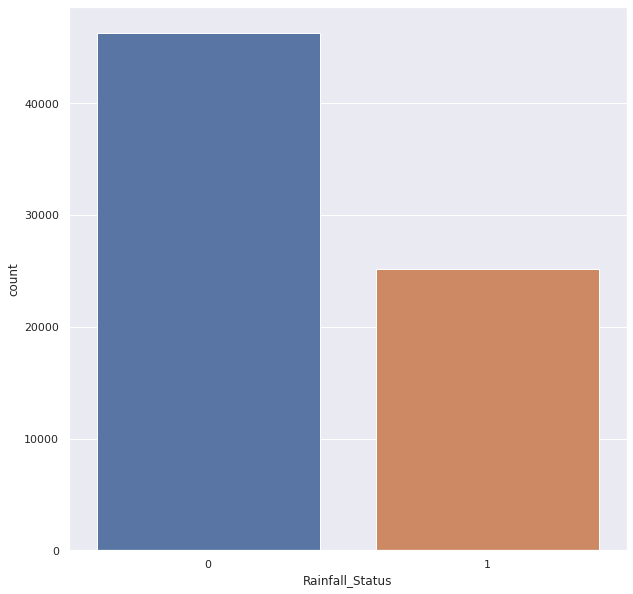

In [0]:
T=australia.groupby(['Rainfall_Status']).size()
# check 1s and 0s in target variable
sns.countplot(x="Rainfall_Status", data=australia)
australia.loc[:,'Rainfall_Status'].value_counts()

In [0]:
T_1=australia.iloc[:,:][australia[australia.T.index[-1]]=='1']
print(T_1)
T_0=australia.iloc[:,:][australia[australia.T.index[-1]]=='0']
print(T_0)

        0         1         2  ...  WindDir3pm_WNW  WindDir3pm_WSW  Rainfall_Status
3     NaN -0.539958  0.619503  ...               0               0                1
4     NaN  0.703537  1.225809  ...               0               0                1
8     NaN -0.465049  1.169408  ...               0               0                1
10    NaN  0.089280  0.957906  ...               0               0                1
11    NaN  0.463827 -0.268807  ...               0               0                1
...    ..       ...       ...  ...             ...             ...              ...
71356 NaN  1.887105  1.536012  ...               1               0                1
71357 NaN  1.707323  1.677014  ...               0               0                1
71373 NaN  1.602450  0.337500  ...               0               0                1
71374 NaN  1.078084  1.070707  ...               0               0                1
71375 NaN  1.602450  1.338610  ...               0               0          

In [0]:
#We choose each 25000 of each to make the balance of our target
T_1=T_1.sample(25000)  
T_0=T_0.sample(25000)
australia=pd.concat((T_1,T_0))

In [0]:
australia

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rainfall_Status
2745,NaN,-1.124251,-0.804613,-0.068101,0.056451,0.561435,-0.601283,-0.714926,0.092861,0.491879,-0.137303,-0.393163,-1.071237,0.800088,-0.724068,-0.629417,-0.713129,-0.996561,-0.998180,-0.161653,-0.628345,-0.660975,-1.071065,-0.904587,-0.770201,-0.897980,-0.867726,-1.130201,-1.134574,-0.428434,-0.898926,-0.931056,-0.981017,-0.819232,-0.097399,-0.323560,-0.171755,-0.858023,-0.814089,-0.363391,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
22312,NaN,0.089280,0.337500,-0.135148,-1.022244,-0.337816,-0.301591,-1.053857,0.206118,1.684412,0.321158,-0.602694,-0.370064,-0.090773,-0.915439,0.129579,0.468710,-0.159844,0.039598,-0.124760,-0.732479,-0.196229,-0.130721,-0.798897,0.155740,0.943899,0.237240,0.084398,0.087953,-0.048533,-0.616639,-0.093798,0.095742,0.195254,-0.101817,-0.779021,-0.202371,-0.035489,-0.905912,0.358993,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
23655,NaN,-0.779668,0.661803,-0.269242,0.134429,0.778996,0.372715,-0.827903,0.659145,1.741199,-1.156107,-1.636384,-1.730340,0.978261,-0.724068,-0.733593,0.658388,-0.832664,-0.506123,-0.215470,-0.439866,-0.299389,-0.546114,-0.850141,-0.318023,-0.198905,-0.951639,-0.794490,-0.795572,-0.056468,-0.779136,-0.811982,-0.498808,0.551561,-0.236937,0.190889,0.835023,0.740951,-0.622251,0.998256,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8535,NaN,0.149208,-0.409808,-0.269242,0.550312,0.735484,-0.826052,-1.505764,-1.039708,1.230114,0.346628,1.422778,1.424940,1.334605,-0.149957,-0.257360,0.060173,-0.099743,-0.217216,-0.215470,0.282917,0.507520,-0.385636,-1.142232,-0.640138,0.801099,0.301510,0.174082,0.174379,1.078276,-0.024981,-0.231061,-0.028155,-0.510883,-0.236937,0.091902,0.155548,-0.800809,-1.354251,-0.980971,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
41252,NaN,1.377722,0.675903,1.026996,0.472334,-1.701197,-0.975898,-1.505764,-0.813195,1.286901,0.728679,-1.063664,-1.211472,1.334605,1.381008,0.709988,0.716750,1.521875,1.170991,1.224152,0.965157,-0.830941,0.187150,-1.142232,0.011840,2.350520,1.678072,1.364466,1.362148,2.379661,2.491647,1.069197,1.203431,0.567738,1.189794,0.471478,-1.193170,-0.432974,-1.354251,-0.474620,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33542,NaN,-1.079306,-0.875113,-0.269242,-0.983255,-0.163767,-1.425435,-1.505764,-1.266222,1.741199,0.066457,2.344718,2.546817,-1.159807,0.998267,-1.403296,-0.713129,-0.978497,-0.987660,-0.215470,-0.877639,-0.807316,-1.232470,-1.142232,-1.110580,-0.602295,-0.788510,-1.068844,-1.068194,-1.000765,-0.358309,-1.051953,-0.958601,-0.869586,-0.236937,-0.865598,-0.576479,-1.337275,-1.354251,-1.239969,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
25011,NaN,0.358954,0.732304,-0.269242,-0.099505,-0.004223,-0.301591,-1.505764,0.092861,1.002965,-0.595765,0.403058,0.541461,-0.447118,0.232785,0.144462,0.74

In [0]:
#Lets split the data into training and validation first
y = australia['Rainfall_Status']
X = australia.drop(columns='Rainfall_Status')

In [0]:
X.shape

(50000, 221)

In [0]:
#fillna with 0
X.fillna(0, inplace=True)

In [0]:
#delete the column all = 0
X=X.loc[:, (X!= 0).any(axis=0)]

# Modeling

In [0]:
y.shape

(50000,)

In [0]:
X.shape

(50000, 220)

In [0]:
# We are now done with feature engineering i.e polynomial features and data standardisation
# Time to fit models now
validation_size = 0.20
seed = 123
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

test

In [0]:
####################################################
# Spot-Check Algorithms
models = []
models.append(('GBC', GradientBoostingClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('BagC', BaggingClassifier()))

In [0]:
results = []
names = []

for name, model in models:
	kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

GBC: 0.774225 (0.005923)
CART: 0.689275 (0.006316)
RFC: 0.770075 (0.006222)
LDA: 0.775200 (0.007755)
KNN: 0.738550 (0.005352)
NB: 0.733100 (0.005760)
ETC: 0.773550 (0.005559)
BagC: 0.748375 (0.002268)


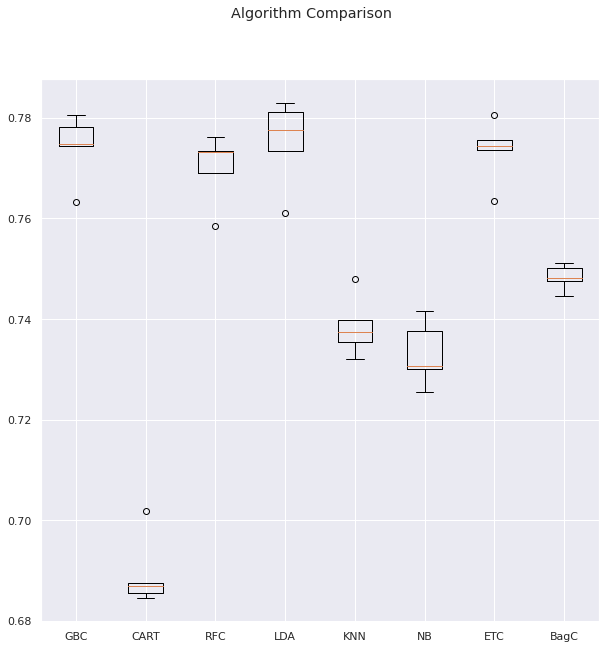

In [0]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## We choose RandomForestClassifier(RFC)

In [0]:
############################################
# Make predictions on validation dataset
Model1 = RandomForestClassifier()
Model1.fit(X_train, y_train)
predictions = Model1.predict(X_validation)

print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7652
[[3957 1132]
 [1216 3695]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      5089
           1       0.77      0.75      0.76      4911

    accuracy                           0.77     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.77      0.77      0.77     10000



## Hyperparameter Tuning RFC

In [0]:
rf = RandomForestClassifier(random_state = seed)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 820, stop = 940, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(30, 60, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 6, 7, 8, 9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'bootstrap': bootstrap,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [30, 40, 50, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [5, 6, 7, 8, 9],
 'n_estimators': [820, 880, 940]}


In [0]:
#Tuning bootstrap and n_estimators:p_test1:                 
p_test1 = {'bootstrap':[True, False], 'n_estimators':[820, 880, 940]}

tuning = GridSearchCV(estimator =RandomForestClassifier(max_depth=60, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=seed), 
            param_grid = p_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'bootstrap': False, 'n_estimators': 940}, 0.772)

In [0]:
#Tuning max_depth and  max_features:p_test2              
p_test2 = {'max_depth': [30, 40, 50, 60, None],
      'max_features': ['auto', 'sqrt']}
#Let's use GridSearch
tuning = GridSearchCV(estimator =RandomForestClassifier(n_estimators=940, bootstrap=False, min_samples_split=5, min_samples_leaf=2, random_state=seed), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 60, 'max_features': 'auto'}, 0.772)

In [0]:
#Tuning min_samples_leaf andmin_samples_spilt  ：p_test3          
p_test3 = {'min_samples_split':[5, 6, 7, 8, 9], 'min_samples_leaf':[0, 1, 2]}

tuning = GridSearchCV(estimator =RandomForestClassifier(n_estimators=940, bootstrap=False, max_depth=60, max_features='auto', random_state=seed),
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'min_samples_leaf': 2, 'min_samples_split': 8}, 0.7723000000000001)

Now we know the best parameters:

n_estimators=940

bootstrap=False

max_depth=60

max_features='auto'

min_samples_split=8

min_samples_leaf=2


In [0]:
forest = RandomForestClassifier(random_state = seed)
modelF = forest.fit(X_train, y_train)
predictions = modelF.predict(X_validation)
print(accuracy_score(y_validation, predictions))

0.7667


In [0]:
forest2 = RandomForestClassifier(n_estimators=880,
bootstrap=False,
min_samples_split=8,
min_samples_leaf=2,
max_depth=60,
max_features='auto',
random_state = seed)
modelT = forest2.fit(X_train, y_train)
predictions = modelT.predict(X_validation)
print(accuracy_score(y_validation, predictions))

0.7685


# Feature Importance

**Merge Numeric and Dummy Variables for Importance feature analysis**

Compared to Imputation for completing missing values using k-Nearest Neighbors for modeling, we just fill na with 0 for original data for the later Importance feature analysis

In [0]:
X_num.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2


In [0]:
#Now we get a nice merged data
X_tmp_FIA = pd.concat([X_num, X_cate], axis=1)
X_tmp_FIA.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Darwin,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_Mildura,Location_Moree,Location_Newcastle,Location_Perth,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_Townsville,Location_Wollongong,Location_Woomera,WindGustDir_ENE,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
y = pd.DataFrame(y)
australia_FIA = pd.concat([X_tmp_FIA, y], axis=1)

In [0]:
australia_FIA.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Darwin,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_Mildura,Location_Moree,Location_Newcastle,Location_Perth,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_Townsville,Location_Wollongong,Location_Woomera,WindGustDir_ENE,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rainfall_Status
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


**Balance our data for modeling**

In [0]:
T_1=australia_FIA.iloc[:,:][australia_FIA[australia_FIA.T.index[-1]]=='1']
print(T_1)
T_0=australia_FIA.iloc[:,:][australia_FIA[australia_FIA.T.index[-1]]=='0']
print(T_0)

       MinTemp  MaxTemp  ...  WindDir3pm_WSW  Rainfall_Status
3          9.2     28.0  ...               0                1
4         17.5     32.3  ...               0                1
8          9.7     31.9  ...               0                1
10        13.4     30.4  ...               0                1
11        15.9     21.7  ...               0                1
...        ...      ...  ...             ...              ...
71356     25.4     34.5  ...               0                1
71357     24.2     35.5  ...               0                1
71373     23.5     26.0  ...               0                1
71374     20.0     31.2  ...               0                1
71375     23.5     33.1  ...               0                1

[25136 rows x 85 columns]
       MinTemp  MaxTemp  ...  WindDir3pm_WSW  Rainfall_Status
0         13.4     22.9  ...               0                0
1          7.4     25.1  ...               1                0
2         12.9     25.7  ...               

In [0]:
#We choose each 25000 of each to make the balance of our target
T_1=T_1.sample(25000)  
T_0=T_0.sample(25000)
australia_FIA=pd.concat((T_1,T_0))

In [0]:
australia_FIA

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Darwin,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_Mildura,Location_Moree,Location_Newcastle,Location_Perth,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_Townsville,Location_Wollongong,Location_Woomera,WindGustDir_ENE,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rainfall_Status
69676,25.2,33.9,0.0,6.0,10.0,28.0,9.0,19.0,66.0,51.0,1008.9,1006.0,1.0,4.0,30.3,31.7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
56124,14.0,21.1,3.0,4.2,3.8,NaN,0.0,0.0,80.0,70.0,1013.0,1010.1,6.0,6.0,17.0,19.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21244,5.3,19.4,0.2,NaN,NaN,41.0,19.0,28.0,72.0,54.0,1012.7,1008.4,NaN,NaN,12.3,19.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
44857,21.6,27.8,2.6,NaN,NaN,31.0,17.0,20.0,80.0,60.0,1016.5,1013.3,1.0,NaN,23.5,27.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
40897,19.2,30.1,0.4,1.4,11.9,28.0,4.0,6.0,58.0,70.0,1012.5,1010.7,1.0,4.0,26.9,26.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,22.6,36.7,0.0,11.6,NaN,50.0,20.0,9.0,60.0,29.0,1013.7,1009.5,1.0,1.0,26.3,34.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
27931,16.1,24.4,0.0,3.2,3.5,35.0,17.0,24.0,74.0,59.0,1018.0,1016.1,7.0,7.0,19.3,23.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11713,4.8,22.5,0.0,NaN,NaN,22.0,7.0,6.0,81.0,38.0,1021.2,1018.2,1.0,NaN,12.0,21.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38718,7.0,19.9,0.2,NaN,NaN,41.0,17.0,17.0,90.0,56.0,1027.5,1021.7,NaN,NaN,12.7,19.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Lets split the data into training and validation first
y = australia_FIA['Rainfall_Status']
X = australia_FIA.drop(columns='Rainfall_Status')

In [0]:
X.shape

(50000, 84)

In [0]:
y.shape

(50000,)

In [0]:
#fillna with 0
X.fillna(0, inplace=True)

In [0]:
#delete the column all = 0
X=X.loc[:, (X!= 0).any(axis=0)]

In [0]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Darwin,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_Mildura,Location_Moree,Location_Newcastle,Location_Perth,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_Townsville,Location_Wollongong,Location_Woomera,WindGustDir_ENE,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
69676,25.2,33.9,0.0,6.0,10.0,28.0,9.0,19.0,66.0,51.0,1008.9,1006.0,1.0,4.0,30.3,31.7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
56124,14.0,21.1,3.0,4.2,3.8,0.0,0.0,0.0,80.0,70.0,1013.0,1010.1,6.0,6.0,17.0,19.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21244,5.3,19.4,0.2,0.0,0.0,41.0,19.0,28.0,72.0,54.0,1012.7,1008.4,0.0,0.0,12.3,19.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
44857,21.6,27.8,2.6,0.0,0.0,31.0,17.0,20.0,80.0,60.0,1016.5,1013.3,1.0,0.0,23.5,27.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
40897,19.2,30.1,0.4,1.4,11.9,28.0,4.0,6.0,58.0,70.0,1012.5,1010.7,1.0,4.0,26.9,26.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**use model we tunning to show feature importance analysis**

In [0]:
validation_size = 0.20
seed = 123
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [0]:
forest2 = RandomForestClassifier(n_estimators=940,
bootstrap=False,
min_samples_split=8,
min_samples_leaf=2,
max_depth=60,
max_features='auto',
random_state = seed)
modelT = forest2.fit(X_train, y_train)
predictions = modelT.predict(X_validation)
print(accuracy_score(y_validation, predictions))

0.7784


In [0]:
from sklearn.inspection import permutation_importance

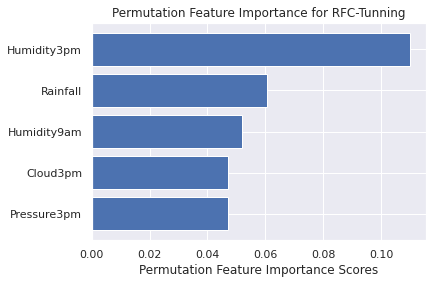

In [0]:
num = 5
results = permutation_importance(modelT, X_train, y_train, scoring='neg_mean_absolute_error')
# get importance
importance = results.importances_mean
sorted_idx = np.argsort(importance)[-num:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[-num:], importance[sorted_idx], align='center')
plt.yticks(pos[-num:], X.columns[sorted_idx])
plt.xlabel('Permutation Feature Importance Scores')
plt.title('Permutation Feature Importance for RFC-Tunning')
plt.show()

We can see the Humidity 3pm ranks 1st! So be careful of your feel at 3pm!!!

# **Test**
（RFC without polynomial features and Z-score
And dropped NAN values rather than KNN Imputer）

The accuracy gets better slightly(80.275%), the sunshine ranks 2rd in the feature importance analysis,but the Humidity still first! 
see more in the paper Page 10